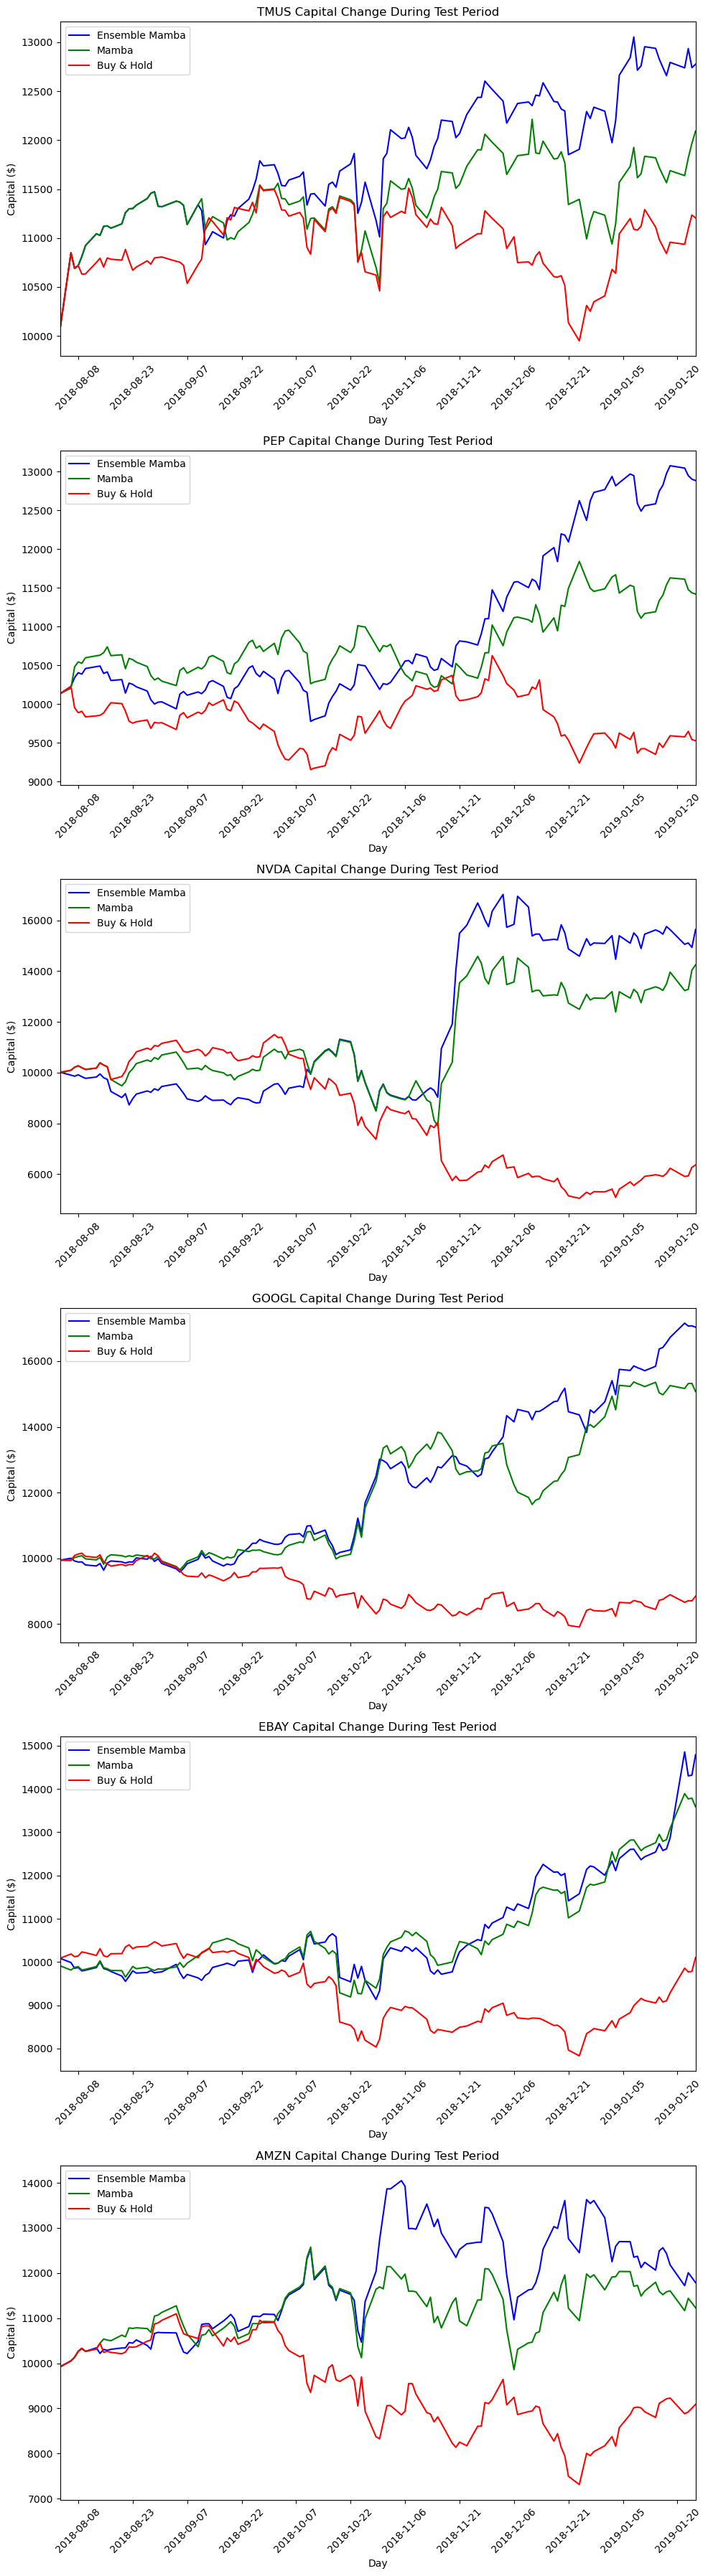

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

files = ['tmus.csv', 'pep.csv', 'nvda.csv', 'googl.csv', 'ebay.csv', 'amzn.csv']
num_files = len(files)
fig, axes = plt.subplots(num_files, 1, figsize=(10, 6 * num_files))


for i, file in enumerate(files):
    df = pd.read_csv(file)  
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    label = file.split('.')[0].upper()
    
    axes[i].plot(df.index, df['Ensemble_Mamba'], label=f'Ensemble Mamba', color='blue')
    axes[i].plot(df.index, df['Mamba'], label=f'Mamba', color='green')
    axes[i].plot(df.index, df['BH_Value'], label=f'Buy & Hold', color='red')
    
    axes[i].set_title(f'{label} Capital Change During Test Period')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Capital ($)')
    
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=15))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()
    axes[i].set_xlim([df.index.min(), df.index.max()])

plt.tight_layout()
plt.show()
